### DOCUMENT REPRESENTATION

Text is an unstructured data type. Therefore, we need to transform it into structural, numerical values to enable machine learning solutions. 

___
### VECTORIZATION (VECTOR REPRESENTATION)


There are many advantages to vectorization. Vectors can easily be compared and their similarity/distance can easily be calculated. 

In [1]:
# VECTOR REPRESENTATION
import numpy as np

a  =   [ 2 , 3 , 5 ]   #   this   in   mathematical   terms ,   is   a   vector
b  =  np.array(a)   # this   is   still   a   vector   in   mathematical   terms 
c  =  ( 2 , 3 , 5 ) #   this   is   an   immutable   vector ,   but   still   a   vector

print(a)
print(b)
print(c)

[2, 3, 5]
[2 3 5]
(2, 3, 5)


___
### BAG OF WORDS (BOW) 

BOW is the vectorization approach which consists of tokenization, counting, term-weighting, and normalization. 

**Example:** <BR>
D1 = "The sky is blue." <BR>
D2 = "The sun is bright." <BR>
Vocabulary = ['blue', 'bright', 'is', 'sky', 'sun', 'the']

**Vector Representation:** 
<BR>    

|.              |  Vocabulary:     |blue|bright|is|sky|sun|the|
|---------------|------------------|----|------|--|---|---|---|
|D1:            |The sky is blue   |1   |     0| 1| 1 | 0 |1  |
|D2:            |The sun is bright |0   | 1    | 1 |0 |1  | 1 |
    
- Note that the features (terms) are binary, 1 or 0, depending on whether a particular word in the vocabulary occurs in a particular document. We can also use other features such as count and frequency.    


### CountVectorizer

First, let's create a very simple corpus that consists of two documents. 

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import OrderedDict

corpus = [
    "The sky is blue.", 
    "The sun is bright.",
]

Then, we create our vectorizer object. sklearn has several other vectorizers, but here, we will use the most basic one that is CountVectorizer. 

In [3]:
vectorizer = CountVectorizer()

## To see the class definition: 
# print(vectorizer)

fit() calculates the parameters of the vector.

transform() applies these parameters to a set of examples.

fit_transform() is using fit() and transform() consecutevily. It is done to "train" a model. In this case, a BoW model...

The result of fit_transform() operation is a sparse vector. Check out the type and the shape of the sparse vector.

In [4]:
## transform the corpus into a sparse vector
V_sparse =  vectorizer.fit_transform(corpus)
print("Type of V_sparse: ", type(V_sparse))
print("Shape of V_sparse: ",V_sparse.shape)
print("V_sparse:\n", V_sparse)

Type of V_sparse:  <class 'scipy.sparse.csr.csr_matrix'>
Shape of V_sparse:  (2, 6)
V_sparse:
   (0, 5)	1
  (0, 3)	1
  (0, 2)	1
  (0, 0)	1
  (1, 5)	1
  (1, 2)	1
  (1, 4)	1
  (1, 1)	1


__UNDERSTAND__: The difference between a sparse array representation and a dense array representation. 

They are different representations of the same array. But machine learning models usually require dense arrays as inputs. So, we need to convert. 

In [5]:
## We need a dense vector representation.
# Learn the vocabulary dictionary and return term-document matrix. This is equivalent to fit followed by transform, but more efficiently implemented.
X = vectorizer.fit_transform(corpus).todense()
print("Type of X: ", type(X))
print("Shape of X: ",X.shape)
print("X:\n", X)

Type of X:  <class 'numpy.matrix'>
Shape of X:  (2, 6)
X:
 [[1 0 1 1 0 1]
 [0 1 1 0 1 1]]


In [6]:
## Display the feature names
print("Feature names: ", vectorizer.get_feature_names())

Feature names:  ['blue', 'bright', 'is', 'sky', 'sun', 'the']


In [7]:
## Display the vocabulary of the corpus
print("Type of vectorizer_vocabulary_: ", type(vectorizer.vocabulary_))
print("Vocabulary: ", OrderedDict(sorted(vectorizer.vocabulary_.items())))
print("X:\n", X)

Type of vectorizer_vocabulary_:  <class 'dict'>
Vocabulary:  OrderedDict([('blue', 0), ('bright', 1), ('is', 2), ('sky', 3), ('sun', 4), ('the', 5)])
X:
 [[1 0 1 1 0 1]
 [0 1 1 0 1 1]]


__Exercise 1__

Use the following corpus that consists of news titles. 

Define a CountVectorizer. 

Transform the corpus into a sparse vector. Print the sparse matrix. 

Transform into a dense vector. Tip: Use todense(). Print the dense matrix. 

Display the feature names. 

Display the vocabulary of the corpus. Use an ordered dictionary to display the words as well. 

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import OrderedDict

corpus_news_titles = [
    "Dutch coronavirus confirmed cases rise over 20.", 
    "Dutch aim for maximum corona control",
    "Economic support package later today", 
    "Coronavirus and your rights at work", 
    "Artificial Intelligence to rapidly accelerate development in pharma"
]

## Define a countvectorizer

## transform the corpus into a sparse vector. Print the sparse matrix. 

## Transform into a dense vector. Use todense(). Print the dense matrix.

## Display the feature names

## Display the vocabulary of the corpus. Use an ordered dictionary to display the words as well. 


In [9]:
#### SOLUTION

from sklearn.feature_extraction.text import CountVectorizer
from collections import OrderedDict

corpus_news_titles = [
    "Dutch corona virus cases rise", 
    "Dutch aim for maximum corona control",
    "Economic support package today", 
    "Corona virus and your rights at work", 
    "Artificial Intelligence to support work"
]

## Define a countvectorizer
vect_news = CountVectorizer()

## transform the corpus into a sparse vector. Print the sparse matrix. 
V_sparse_news =  vect_news.fit_transform(corpus_news_titles)

## Transform into a dense vector. Use todense(). Print the dense matrix.
X_news = V_sparse_news.todense()

## Display the feature names
print("Feature names: ", vect_news.get_feature_names(), '\n')

## Display the vocabulary of the corpus. Use an ordered dictionary to display the words as well. 
print("Vocabulary: ",(vect_news.vocabulary_.items()), '\n')
print("Ordered Vocabulary: ",OrderedDict(sorted(vect_news.vocabulary_.items())), '\n')


X_news

Feature names:  ['aim', 'and', 'artificial', 'at', 'cases', 'control', 'corona', 'dutch', 'economic', 'for', 'intelligence', 'maximum', 'package', 'rights', 'rise', 'support', 'to', 'today', 'virus', 'work', 'your'] 

Vocabulary:  dict_items([('dutch', 7), ('corona', 6), ('virus', 18), ('cases', 4), ('rise', 14), ('aim', 0), ('for', 9), ('maximum', 11), ('control', 5), ('economic', 8), ('support', 15), ('package', 12), ('today', 17), ('and', 1), ('your', 20), ('rights', 13), ('at', 3), ('work', 19), ('artificial', 2), ('intelligence', 10), ('to', 16)]) 

Ordered Vocabulary:  OrderedDict([('aim', 0), ('and', 1), ('artificial', 2), ('at', 3), ('cases', 4), ('control', 5), ('corona', 6), ('dutch', 7), ('economic', 8), ('for', 9), ('intelligence', 10), ('maximum', 11), ('package', 12), ('rights', 13), ('rise', 14), ('support', 15), ('to', 16), ('today', 17), ('virus', 18), ('work', 19), ('your', 20)]) 



matrix([[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0]],
       dtype=int64)

___
### TODO BEFORE MOVING ON
#### Copy your functions from the previous notebook

We will/may need: 

- your tokenization function
- your stemmer function
- your lemmatizer function
- your stop word removal function

In [10]:
## OUR PREPROCESSING PIPELINE
# Copy your pipeline functions here. Tokenization, Lowercase, remove punctuation, remove stop words, stemming
#
#
# The functions below may not be sufficient. Put the ones you created before. 

import nltk
import string
from nltk.stem import PorterStemmer

#print (ps.stem('preprocessing'))
def tokenize(text):
    no_punct = text.translate(text.maketrans('','', string.punctuation))
    words = nltk.word_tokenize(no_punct.lower())
    return words

def remove_stopwords(tokens):
    stopword_list = nltk.corpus.stopwords.words('english')
    filtered_tokens = [ token for token in tokens if token.lower() not in stopword_list ]
    return filtered_tokens

def pre_process(text):
    ps = PorterStemmer()
    stems = (ps.stem(w) for w in tokenize(text))
    no_stops = remove_stopwords(stems)
    #no_stops = stems
    return (no_stops)


In [11]:
## A neat trick: How to call your custom pre-processing pipeline functions during the vectorization process.

corpus = [
    "The sky is blue.", 
    "The sun is bright.",
]

vectorizer = CountVectorizer(analyzer=pre_process) ## Set the analyzer parameter to the name of your function. Make sure your function returns a list of word tokens!

# Learn the vocabulary dictionary and return term-document matrix. This is equivalent to fit followed by transform, but more efficiently implemented.
X = vectorizer.fit_transform(corpus).todense()
print("Vocabulary: ", OrderedDict(sorted(vectorizer.vocabulary_.items())), '\n')
print("X:\n", X)

Vocabulary:  OrderedDict([('blue', 0), ('bright', 1), ('sky', 2), ('sun', 3)]) 

X:
 [[1 0 1 0]
 [0 1 0 1]]


In [12]:
## This cell is just to see how it is without the custom pre_processing. Run and compare the outcome with the previous cell outcome.

corpus = [
    "The sky is blue.", 
    "The sun is bright.",
]

vectorizer = CountVectorizer() ## Set the analyzer parameter to the name of your function. Make sure your function returns a list of word tokens!

# Learn the vocabulary dictionary and return term-document matrix. This is equivalent to fit followed by transform, but more efficiently implemented.
X = vectorizer.fit_transform(corpus).todense()
print("Vocabulary: ", OrderedDict(sorted(vectorizer.vocabulary_.items())))
print("X:\n", X)

Vocabulary:  OrderedDict([('blue', 0), ('bright', 1), ('is', 2), ('sky', 3), ('sun', 4), ('the', 5)])
X:
 [[1 0 1 1 0 1]
 [0 1 1 0 1 1]]


__Exercise 2__

Vectorize the news titles using your custom preprocessing pipeline. 

Compare the effect of preprocessing on the vocabulary size.

In [13]:
## Create your magic here...

from sklearn.feature_extraction.text import CountVectorizer
from collections import OrderedDict

corpus_news_titles = [
    "Dutch corona virus cases rise", 
    "Dutch aim for maximum corona control",
    "Economic support package today", 
    "Corona virus and your rights at work", 
    "Artificial Intelligence to support work"
]

## Define a countvectorizer

## transform the corpus into a sparse vector. Print the sparse matrix. 

## Transform into a dense vector. Use todense(). Print the dense matrix.

## Display the feature names

## Display the vocabulary of the corpus. Use an ordered dictionary to display the words as well. 


In [14]:
#### SOLUTION

from sklearn.feature_extraction.text import CountVectorizer
from collections import OrderedDict

corpus_news_titles = [
    "Dutch corona virus cases rise", 
    "Dutch aim for maximum corona control",
    "Economic support package today", 
    "Corona virus and your rights at work", 
    "Artificial Intelligence to support work"
]

## Define a countvectorizer
vect_news = CountVectorizer(analyzer=pre_process)

## transform the corpus into a sparse vector. Print the sparse matrix. 
V_sparse_news =  vect_news.fit_transform(corpus_news_titles)

## Transform into a dense vector. Use todense(). Print the dense matrix.
X_news = V_sparse_news.todense()

## Display the feature names
print("Feature names: ", vect_news.get_feature_names(), '\n')

## Display the vocabulary of the corpus. Use an ordered dictionary to display the words as well. 
print("Vocabulary: ",(vect_news.vocabulary_.items()), '\n')
print("Ordered Vocabulary: ",OrderedDict(sorted(vect_news.vocabulary_.items())), '\n')


X_news


Feature names:  ['aim', 'artifici', 'case', 'control', 'corona', 'dutch', 'econom', 'intellig', 'maximum', 'packag', 'right', 'rise', 'support', 'today', 'viru', 'work'] 

Vocabulary:  dict_items([('dutch', 5), ('corona', 4), ('viru', 14), ('case', 2), ('rise', 11), ('aim', 0), ('maximum', 8), ('control', 3), ('econom', 6), ('support', 12), ('packag', 9), ('today', 13), ('right', 10), ('work', 15), ('artifici', 1), ('intellig', 7)]) 

Ordered Vocabulary:  OrderedDict([('aim', 0), ('artifici', 1), ('case', 2), ('control', 3), ('corona', 4), ('dutch', 5), ('econom', 6), ('intellig', 7), ('maximum', 8), ('packag', 9), ('right', 10), ('rise', 11), ('support', 12), ('today', 13), ('viru', 14), ('work', 15)]) 



matrix([[0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
        [1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
        [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1]], dtype=int64)

In [15]:
############ Run the following part after covering the subject of train and test sets (below). 
smatrix = vect_news.transform(['now a document without any word in training set'])
print("BOW Representation of test_set:\n", smatrix)

print("\n")

X = smatrix.todense()
X


BOW Representation of test_set:
 




matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

___
### The notions of training_set and test_set

In this context, training_set is the corpus on which we build our vocabulary. 
The test_set is the new corpus which we map on our existing vocabulary. 
- The training_set may not inculde all words in the test_set. So, the documents in the test_set may not be fully represented by the vocabulary we built using the training_set. 


In [16]:
train_set = ("The sky is blue.", "The sun is bright.")
test_set = ("The sun in the sky is bright.",
    "We can see the shining sun, the bright sun.")

vectorizer = CountVectorizer(analyzer=pre_process)

# Learn a vocabulary dictionary of all tokens in the raw documents.
vectorizer.fit(train_set) 
print("Vocabulary (train_set): ", OrderedDict(sorted(vectorizer.vocabulary_.items())))

print("\n")

# Transform documents to document-term matrix. Extract token counts out of raw text documents using the vocabulary fitted with fit.
smatrix = vectorizer.transform(test_set)
print("BOW Representation of test_set:\n", smatrix)

print("\n")

X = smatrix.todense()
#print(X.shape)
print("BOW Representation of test_set (dense matrix):\n", X)


Vocabulary (train_set):  OrderedDict([('blue', 0), ('bright', 1), ('sky', 2), ('sun', 3)])


BOW Representation of test_set:
   (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (1, 1)	1
  (1, 3)	2


BOW Representation of test_set (dense matrix):
 [[0 1 1 1]
 [0 1 0 2]]


___
### COUNT vs. FREQUENCY 
We mentioned that we can use term weighting other than the binary approach. We exemplified CountVectorizer which creates vectors using the count of words. But these have shortcomings in dealing with large documents. So, at this point, we try normalizing the weight with the vector size (i.e. frequency instead of count).




In [17]:
# COUNT VS TERM-FREQUENCY
# Is the count of word a suitable measure? What happens if our documents differ in size? 
# We can normalize the word count into frequency by dividing the vector by the sum of non-zero elements in it.

# Remember the vocabulary
print("Vocabulary (train_set): ", OrderedDict(sorted(vectorizer.vocabulary_.items())), '\n')
# Remember the test set:
print("test_set: ",test_set, '\n')

import sklearn.preprocessing
smatrix_normalized = sklearn.preprocessing.normalize(smatrix, axis=1, norm='l1')
print("Normalized sparse matrix\n", smatrix_normalized, '\n')

# Dense matrix representation (Features are Term Frequency - Tf)
print("Normalized dense matrix\n", smatrix_normalized.todense())

Vocabulary (train_set):  OrderedDict([('blue', 0), ('bright', 1), ('sky', 2), ('sun', 3)]) 

test_set:  ('The sun in the sky is bright.', 'We can see the shining sun, the bright sun.') 

Normalized sparse matrix
   (0, 1)	0.3333333333333333
  (0, 2)	0.3333333333333333
  (0, 3)	0.3333333333333333
  (1, 1)	0.3333333333333333
  (1, 3)	0.6666666666666666 

Normalized dense matrix
 [[0.         0.33333333 0.33333333 0.33333333]
 [0.         0.33333333 0.         0.66666667]]


___ 
### SIMILARITY CALCULATION
There are multiple ways to calculate the smilarity of vectors. Below are the examples of how to calculate them using sklearn. 

- Manhattan Distance
- Euclidean Distance
- Minkowski Distance
- Cosine Distance

Be able to explain the difference between these distance measures and decide which one is the most appropriate to use in certain situations.

**Question:** - How is distance related to similarity?


In [18]:
import numpy as np 
# Check the behavior of different similarity measures 
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

vec1 = np.array([[1,4]])
vec2 = np.array([[10,40]])
vec3 = np.array([[4,1]])

# MANHATTAN DISTANCE
# Formula: d = sum(|x - y|)
from sklearn.metrics.pairwise import manhattan_distances
print('Manhattan Distance: ', manhattan_distances(vec1, vec2))

# EUCLIDEAN DISTANCE
# Formula: d = sqrt(sum((x - y)^2))
from sklearn.metrics.pairwise import euclidean_distances
print('Euclidean Distance: ', euclidean_distances(vec1, vec2))

# MINKOWSKI DISTANCE
# Formula: d = sum(|x - y|^p)^(1/p)
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('minkowski')
print('Minkowski Distance: ', dist.pairwise(vec1, vec2))

# COSINE DISTANCE
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

#print(cosine_similarity([vec1, vec2]))
print('Cosine Similarity: ', cosine_similarity(vec1, vec2))

Manhattan Distance:  [[45.]]
Euclidean Distance:  [[37.10795063]]
Minkowski Distance:  [[37.10795063]]
Cosine Similarity:  [[1.]]


___
### Exercise 3 
#### Similarity Calculation on a Simple Text Corpus

Do: 

1. Build a vocabulary using the training set (Vectorize the training set) using (a) CountVectorizer and (b) Term Frequency.  
2. Express the test set as vectors using the vectorizer you trained in the previous step. 
3. Calculate the difference/similarity using all similarity measures we introduced earlier. 
4. Compare the difference (CountVectorizer vs Term Frequency), (between different similarity measures)

In [19]:
# Try it with a real example

train_set = ("The sky is blue.", "The sun is bright.")
test_set = ("The sun in the sky is bright.",
    "We can see the shining sun, the bright sun.")

# your magic happens here :)
#
#
#


In [20]:
########## SOLUTION
from sklearn.feature_extraction.text import CountVectorizer
from collections import OrderedDict
import sklearn.preprocessing

# Build a vocabulary using the training set (Vectorize the training set) using (a) CountVectorizer and (b) Term Frequency.
vectorizer = CountVectorizer()

vectorizer.fit(train_set) 
print("Vocabulary (train_set): ", OrderedDict(sorted(vectorizer.vocabulary_.items())), '\n')

# Express the test set as vectors using the vectorizer you trained in the previous step.
smatrix = vectorizer.transform(test_set)
X = smatrix.todense()

smatrix_normalized = sklearn.preprocessing.normalize(smatrix, axis=1, norm='l1')
X_normalized = smatrix_normalized.todense()

# Calculate the difference/similarity using all similarity measures we introduced earlier.

vec1 = X[0]
vec2 = X[1]
print('D1:  ', vec1, '\n', 'D2 :', vec2, '\n')
# MANHATTAN DISTANCE
from sklearn.metrics.pairwise import manhattan_distances
print(manhattan_distances(vec1, vec2))

# EUCLIDEAN DISTANCE
# Formula: d = sqrt(sum((x - y)^2))
from sklearn.metrics.pairwise import euclidean_distances
print(euclidean_distances(vec1, vec2))

# MINKOWSKI DISTANCE
# Formula: d = sum(|x - y|^p)^(1/p)
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('minkowski')
print(dist.pairwise(vec1, vec2))

# COSINE DISTANCE
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
print(cosine_similarity(vec1, vec2))

# Compare the difference (CountVectorizer vs Term Frequency), (between different similarity measures)

vec1 = X_normalized[0]
vec2 = X_normalized[1]
print(' D1:  ', vec1, '\n', 'D2 :', vec2, '\n')
# MANHATTAN DISTANCE
from sklearn.metrics.pairwise import manhattan_distances
print(manhattan_distances(vec1, vec2))

# EUCLIDEAN DISTANCE
# Formula: d = sqrt(sum((x - y)^2))
from sklearn.metrics.pairwise import euclidean_distances
print(euclidean_distances(vec1, vec2))

# MINKOWSKI DISTANCE
# Formula: d = sum(|x - y|^p)^(1/p)
from sklearn.neighbors import DistanceMetric
dist = DistanceMetric.get_metric('minkowski')
print(dist.pairwise(vec1, vec2))

# COSINE DISTANCE
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
print(cosine_similarity(vec1, [[0,0.2, 0, 0, 0.4, 0.4]]))

Vocabulary (train_set):  OrderedDict([('blue', 0), ('bright', 1), ('is', 2), ('sky', 3), ('sun', 4), ('the', 5)]) 

D1:   [[0 1 1 1 1 2]] 
 D2 : [[0 1 0 0 2 2]] 

[[3.]]
[[1.73205081]]
[[1.73205081]]
[[0.82495791]]
 D1:   [[0.         0.16666667 0.16666667 0.16666667 0.16666667 0.33333333]] 
 D2 : [[0.  0.2 0.  0.  0.4 0.4]] 

[[0.66666667]]
[[0.33993463]]
[[0.33993463]]
[[0.82495791]]


__To visualize pairwise similarity__

[[1.         0.82495791]]
[[0.82495791 1.        ]]
[[0.9999999999999998, 0.8249579113843054], [0.8249579113843054, 1.0]]


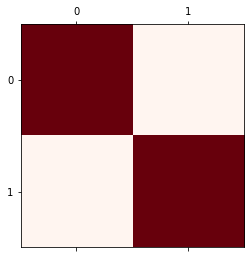

In [21]:
dist_matrix = []
for i in range(len(train_set)):
    dist_out= cosine_similarity(X[i:i+1], X)
    dist_matrix.append(list(dist_out[0]))
    print(dist_out)
print(dist_matrix)

# visualize
import numpy as np
import pandas as pd
from matplotlib import cm as cm
import matplotlib.pyplot as plt


%matplotlib inline

cmap = cm.get_cmap('Reds')
cax = plt.matshow(dist_matrix, interpolation='nearest', cmap=cmap)

### Exercise 4 - Real Data Set

1. Load the data: All text files under the folder data/marvel_movies (done, below!)

2. Represent the documents in BOW. (Use the features: Count, Frequency)

3. Calculate the cosine similarity

4. Plot similarity matrices for two different features. 

5. Compare the results

In [22]:
# EXERCISE 
# IMDB Movie Plot Summary Similarity
# Load Data: 
corpus = []
f = open("data/marvel_movies/avengers1.txt", "r") 
corpus.append(f.read())
f = open("data/marvel_movies/avengers2.txt", "r") 
corpus.append(f.read())
f = open("data/marvel_movies/ironman1.txt", "r") 
corpus.append(f.read())
f = open("data/marvel_movies/ironman2.txt", "r") 
corpus.append(f.read())
#f = open("data/marvel_movies/ironman3.txt", "r") 
#corpus.append(f.read())
f = open("data/marvel_movies/godfather1.txt", "r") 
corpus.append(f.read())
f = open("data/marvel_movies/godfather2.txt", "r") 
corpus.append(f.read())
f = open("data/marvel_movies/godfather3.txt", "r") 
corpus.append(f.read())
#print (corpus)

#analyzer = CountVectorizer().build_analyzer()
#vectorizer = CountVectorizer(analyzer=pre_process)
vectorizer = CountVectorizer(stop_words='english')

489


[[1.         0.59821765 0.51451276 0.56018508 0.51601674 0.55685086
  0.4269229 ]]
[[0.59821765 1.         0.55580092 0.61863784 0.53398447 0.63061999
  0.48108205]]
[[0.51451276 0.55580092 1.         0.61774216 0.47078382 0.52358989
  0.39848821]]
[[0.56018508 0.61863784 0.61774216 1.         0.49782326 0.52255878
  0.43706486]]
[[0.51601674 0.53398447 0.47078382 0.49782326 1.         0.72674115
  0.61578745]]
[[0.55685086 0.63061999 0.52358989 0.52255878 0.72674115 1.
  0.66534815]]
[[0.4269229  0.48108205 0.39848821 0.43706486 0.61578745 0.66534815
  1.        ]]
[[0.9999999999999999, 0.5982176509134094, 0.5145127629688752, 0.5601850774499321, 0.516016744371792, 0.5568508636143134, 0.4269228972973087], [0.5982176509134094, 0.9999999999999998, 0.5558009239740591, 0.618637839776679, 0.5339844728825959, 0.6306199878497027, 0.4810820511196172], [0.5145127629688752, 0.5558009239740591, 0.9999999999999997, 0.6177421638012492, 0.47078382135424457, 0.52358988617394, 0.3984882059370134

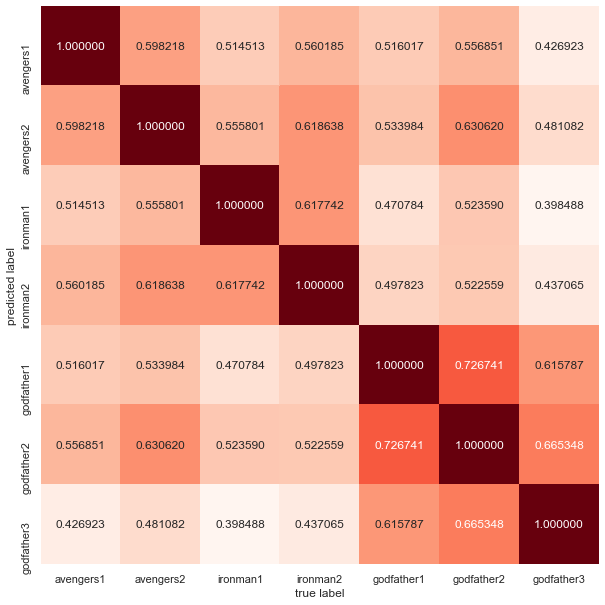

In [23]:
#### SOL

# EXERCISE 
# IMDB Movie Plot Summary Similarity
# Load Data: 
corpus = []
f = open("data/marvel_movies/avengers1.txt", "r") 
corpus.append(f.read())
f = open("data/marvel_movies/avengers2.txt", "r") 
corpus.append(f.read())
f = open("data/marvel_movies/ironman1.txt", "r") 
corpus.append(f.read())
f = open("data/marvel_movies/ironman2.txt", "r") 
corpus.append(f.read())
#f = open("data/marvel_movies/ironman3.txt", "r") 
#corpus.append(f.read())
f = open("data/marvel_movies/godfather1.txt", "r") 
corpus.append(f.read())
f = open("data/marvel_movies/godfather2.txt", "r") 
corpus.append(f.read())
f = open("data/marvel_movies/godfather3.txt", "r") 
corpus.append(f.read())
#print (corpus)


#analyzer = CountVectorizer().build_analyzer()
vectorizer = CountVectorizer()
#vectorizer = CountVectorizer(analyzer=pre_process)
#vectorizer = CountVectorizer(stop_words='english')
#vectorizer = TfidfVectorizer(stop_words='english')

X = vectorizer.fit_transform(corpus).todense()
#print(vectorizer.get_feature_names())
# print(X.shape)
#type(vectorizer.vocabulary_)
print(len(vectorizer.vocabulary_))
#print(X)

smatrix_normalized = sklearn.preprocessing.normalize(vectorizer.fit_transform(corpus), axis=1, norm='l1')
X = smatrix_normalized.todense()

# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
print('\n')
#print(X[7:8])
# dist_out = cosine_similarity(X[6:7], X)

dist_matrix = []
for i in range(len(corpus)):
    #print(i)
    dist_out= cosine_similarity(X[i:i+1], X)
    dist_matrix.append(list(dist_out[0]))
    print(dist_out)
print(dist_matrix)

# visualize
#import numpy as np
#import pandas as pd
#from matplotlib import cm as cm
#import matplotlib.pyplot as plt

#%matplotlib inline

#cmap = cm.get_cmap('Reds')
#cax = plt.matshow(dist_matrix, interpolation='nearest', cmap=cmap)

lbls = ['avengers1', 'avengers2', 'ironman1', 'ironman2', 'godfather1', 'godfather2', 'godfather3']
import seaborn as sns; sns.set()
plt.figure(figsize=(10,12))
sns.heatmap(dist_matrix, square=True, annot=True, fmt='f', cbar=False,
            xticklabels=lbls, yticklabels=lbls, cmap="Reds")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

___
### Term Frequency - Inverse Document Frequency (Tf-Idf)

- Term Frequency (Tf) shows fow prevalent a term is in a single document
- Inverse Document Frequency (Idf) takes into account the distribution of the word over the corpus. In other words, it takes into consideration how common the term is in other documents in the corpus. 
- Tf x Idf is the multiplication of Tf and Idf values. This value can be considered as a specificness/importance measure of a particular term for a particular document.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

corpus_food = ["this is some food", "this is some drink"]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus_food)
print(type(vectorizer.idf_))
print(vectorizer.idf_)
print(OrderedDict(sorted(vectorizer.vocabulary_.items())))
print(X)

<class 'numpy.ndarray'>
[1.40546511 1.40546511 1.         1.         1.        ]
OrderedDict([('drink', 0), ('food', 1), ('is', 2), ('some', 3), ('this', 4)])
  (0, 1)	0.6300993445179441
  (0, 3)	0.44832087319911734
  (0, 2)	0.44832087319911734
  (0, 4)	0.44832087319911734
  (1, 0)	0.6300993445179441
  (1, 3)	0.44832087319911734
  (1, 2)	0.44832087319911734
  (1, 4)	0.44832087319911734


In [32]:
# BASIC TF IDF EXAMPLE
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

D1 = "The sun is bright and the sky is blue." 
D2 = "The sky is blue as the sea."
D3 = "The moon is in the clear sky."

corpus = []
corpus.append(D1)
corpus.append(D2)
corpus.append(D3)

print(corpus)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

# Check the 3 terms having the highest IDF score.
indices = np.argsort(vectorizer.idf_)[::-1]
features = vectorizer.get_feature_names()
top_n = 3
top_features = [features[i] for i in indices[:top_n]]
print (top_features)


['The sun is bright and the sky is blue.', 'The sky is blue as the sea.', 'The moon is in the clear sky.']
['and', 'as', 'blue', 'bright', 'clear', 'in', 'is', 'moon', 'sea', 'sky', 'sun', 'the']
['sun', 'sea', 'moon']


### EXERCISE 5 
### Similarity Calculation on a More Realistic Dataset
- Load the data
-- All text files under the folder data
- Represent the documents in BOW. (Use the features: Count, Frequency, TfIdf)
- Calculate the cosine similarity
- Plot similarity matrices for three different features. 
- Compare the results


In [ ]:
# EXERCISE 
# IMDB Movie Plot Summary Similarity
# Load Data: 
corpus = []
f = open("data/marvel_movies/avengers1.txt", "r") 
corpus.append(f.read())
f = open("data/marvel_movies/avengers2.txt", "r") 
corpus.append(f.read())
f = open("data/marvel_movies/ironman1.txt", "r") 
corpus.append(f.read())
f = open("data/marvel_movies/ironman2.txt", "r") 
corpus.append(f.read())
#f = open("data/marvel_movies/ironman3.txt", "r") 
#corpus.append(f.read())
f = open("data/marvel_movies/godfather1.txt", "r") 
corpus.append(f.read())
f = open("data/marvel_movies/godfather2.txt", "r") 
corpus.append(f.read())
f = open("data/marvel_movies/godfather3.txt", "r") 
corpus.append(f.read())
#print (corpus)



489


[[1.         0.32601595 0.257122   0.27997157 0.22857221 0.27595736
  0.16549132]]
[[0.32601595 1.         0.27531946 0.29206316 0.25359581 0.32113144
  0.20341688]]
[[0.257122   0.27531946 1.         0.33592028 0.21761437 0.27005315
  0.16624729]]
[[0.27997157 0.29206316 0.33592028 1.         0.22406096 0.24425149
  0.17794295]]
[[0.22857221 0.25359581 0.21761437 0.22406096 1.         0.51609377
  0.33693661]]
[[0.27595736 0.32113144 0.27005315 0.24425149 0.51609377 1.
  0.44426093]]
[[0.16549132 0.20341688 0.16624729 0.17794295 0.33693661 0.44426093
  1.        ]]
[[1.0, 0.32601595145263484, 0.25712199870864494, 0.2799715720162477, 0.22857221427771934, 0.27595735652271114, 0.16549131690243435], [0.32601595145263484, 1.0000000000000002, 0.27531946189322254, 0.29206316175859093, 0.25359581154056715, 0.32113144159002294, 0.203416875057021], [0.25712199870864494, 0.27531946189322254, 0.9999999999999999, 0.3359202754269476, 0.2176143664836515, 0.2700531535444979, 0.1662472937053602]

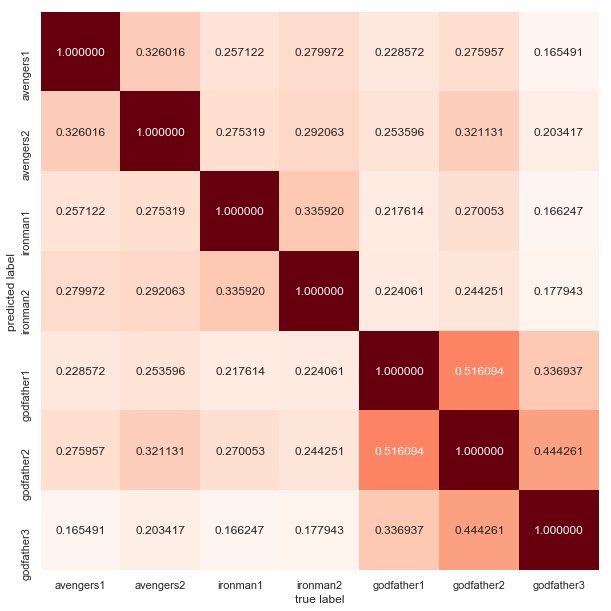

In [13]:
######## SOLUTION

from sklearn.feature_extraction.text import TfidfVectorizer
#analyzer = CountVectorizer().build_analyzer()
#vectorizer = CountVectorizer(analyzer=pre_process)
#vectorizer = CountVectorizer(stop_words='english')
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(corpus).todense()
#print(vectorizer.get_feature_names())
# print(X.shape)
#type(vectorizer.vocabulary_)
print(len(vectorizer.vocabulary_))
#print(X)



# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
print('\n')
#print(X[7:8])
# dist_out = cosine_similarity(X[6:7], X)

dist_matrix = []
for i in range(len(corpus)):
    #print(i)
    dist_out= cosine_similarity(X[i:i+1], X)
    dist_matrix.append(list(dist_out[0]))
    print(dist_out)
print(dist_matrix)

# visualize
#import numpy as np
#import pandas as pd
#from matplotlib import cm as cm
#import matplotlib.pyplot as plt

#%matplotlib inline

#cmap = cm.get_cmap('Reds')
#cax = plt.matshow(dist_matrix, interpolation='nearest', cmap=cmap)

lbls = ['avengers1', 'avengers2', 'ironman1', 'ironman2', 'godfather1', 'godfather2', 'godfather3']
import seaborn as sns; sns.set()
plt.figure(figsize=(10,12))
sns.heatmap(dist_matrix, square=True, annot=True, fmt='f', cbar=False,
            xticklabels=lbls, yticklabels=lbls, cmap="Reds")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

___
### N-Gram Sequences
BOW approach does not take the worder order into consideration. In order to preserve the information carried by word order to some extent, we can use n-grams. N is the number of words appearing consecutively in a sentence. 

**Ex:** 

Sentence: "The quick brown fox jumps"

BOW: ["The", "quick", "brown", "fox", "jumps"]

Bigrams (N=2): ["The_quick", "quick_brown", "brown_fox", "fox_jumps"]

Trigrams (N=3): ["The_quick_brown", "quick_brown_fox", "brown_fox_jumps"]


In [38]:
word_list = "The quick brown fox jumps.".split()

# Bigram
n = 2
all_ngrams = nltk.ngrams(word_list, n)
print(type(all_ngrams))

for grams in all_ngrams:
    print (grams)

# Trigram
n = 3
all_ngrams = nltk.ngrams(word_list, n)
print(type(all_ngrams))

for grams in all_ngrams:
    print (grams)

<class 'generator'>
('The', 'quick')
('quick', 'brown')
('brown', 'fox')
('fox', 'jumps.')
<class 'generator'>
('The', 'quick', 'brown')
('quick', 'brown', 'fox')
('brown', 'fox', 'jumps.')


__ngram_range__ parameter of vectorizers:

In [101]:
train_set = ("The sky is blue.", "The sun is bright.")
test_set = ("The sun in the sky is bright.",
    "We can see the shining sun, the bright sun.")

vectorizer = CountVectorizer(ngram_range=(3,3))

# Learn a vocabulary dictionary of all tokens in the raw documents.
vectorizer.fit(train_set) 
print("Vocabulary (train_set): ", OrderedDict(sorted(vectorizer.vocabulary_.items())))


Vocabulary (train_set):  OrderedDict([('sky is blue', 0), ('sun is bright', 1), ('the sky is', 2), ('the sun is', 3)])


___
### EXERCISE 6 
### Improve the Exercise 5 by adding (a) bigrams and (b) trigrams in the vocabulary

You need to convert ngrams into words before expanding your vocabulary. A common approach to convert an n_gram, is to put the words together and separated by an underscore. 

For ex: ('The', 'quick') -> 'The_quick' 

DO:

- Load the data
-- All text files under the folder data
- Represent the documents in BOW and include n_grams. (Use the features: Count, Frequency, TfIdf)
- Calculate the cosine similarity
- Plot similarity matrices for three different features. 
- Compare the results

In [ ]:
## Create your magic here
## 
##
#
#


2560


[[1.         0.35213338 0.28909731 0.32434687 0.3020048  0.34682809
  0.221936  ]]
[[0.35213338 1.         0.32470499 0.36702333 0.33260208 0.41628244
  0.26765039]]
[[0.28909731 0.32470499 1.         0.35595427 0.27243251 0.32416644
  0.20397311]]
[[0.32434687 0.36702333 0.35595427 1.         0.30246762 0.33288629
  0.23778375]]
[[0.3020048  0.33260208 0.27243251 0.30246762 1.         0.5007166
  0.35376576]]
[[0.34682809 0.41628244 0.32416644 0.33288629 0.5007166  1.
  0.42049528]]
[[0.221936   0.26765039 0.20397311 0.23778375 0.35376576 0.42049528
  1.        ]]
[[0.9999999999999998, 0.35213338202463174, 0.28909730732837036, 0.3243468727075479, 0.3020047955773619, 0.34682809180808366, 0.2219359970777054], [0.35213338202463174, 1.0000000000000002, 0.32470498680643994, 0.3670233252079006, 0.33260207855811674, 0.41628244432368755, 0.26765038710920147], [0.28909730732837036, 0.32470498680643994, 0.9999999999999996, 0.3559542724905154, 0.27243251365738563, 0.3241664416829664, 0.20

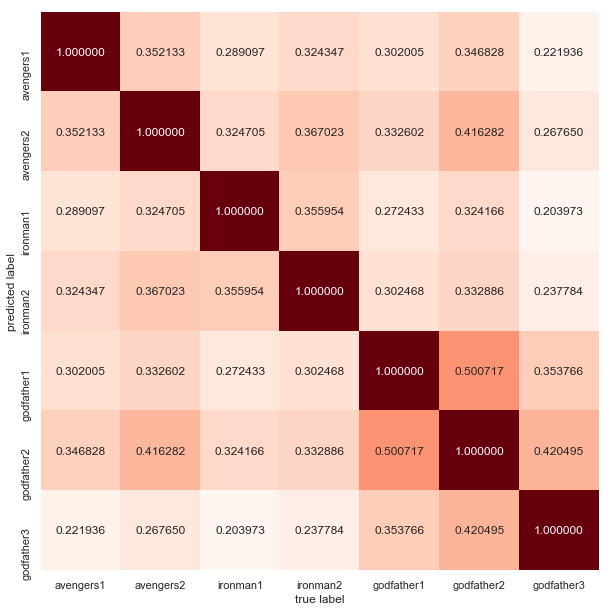

In [105]:
###### SOLUTION

# EXERCISE 
# IMDB Movie Plot Summary Similarity
# Load Data: 
corpus = []
f = open("data/marvel_movies/avengers1.txt", "r") 
corpus.append(f.read())
f = open("data/marvel_movies/avengers2.txt", "r") 
corpus.append(f.read())
f = open("data/marvel_movies/ironman1.txt", "r") 
corpus.append(f.read())
f = open("data/marvel_movies/ironman2.txt", "r") 
corpus.append(f.read())
#f = open("data/marvel_movies/ironman3.txt", "r") 
#corpus.append(f.read())
f = open("data/marvel_movies/godfather1.txt", "r") 
corpus.append(f.read())
f = open("data/marvel_movies/godfather2.txt", "r") 
corpus.append(f.read())
f = open("data/marvel_movies/godfather3.txt", "r") 
corpus.append(f.read())
#print (corpus)

from sklearn.feature_extraction.text import TfidfVectorizer
#analyzer = CountVectorizer().build_analyzer()
#vectorizer = CountVectorizer(analyzer=pre_process)
#vectorizer = CountVectorizer(stop_words='english')
vectorizer = CountVectorizer(ngram_range=(1,3))

X = vectorizer.fit_transform(corpus).todense()
#print(vectorizer.get_feature_names())
# print(X.shape)
#type(vectorizer.vocabulary_)
print(len(vectorizer.vocabulary_))
#print(X)



# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
print('\n')
#print(X[7:8])
# dist_out = cosine_similarity(X[6:7], X)

dist_matrix = []
for i in range(len(corpus)):
    #print(i)
    dist_out= cosine_similarity(X[i:i+1], X)
    dist_matrix.append(list(dist_out[0]))
    print(dist_out)
print(dist_matrix)

# visualize
#import numpy as np
#import pandas as pd
#from matplotlib import cm as cm
#import matplotlib.pyplot as plt

#%matplotlib inline

#cmap = cm.get_cmap('Reds')
#cax = plt.matshow(dist_matrix, interpolation='nearest', cmap=cmap)

lbls = ['avengers1', 'avengers2', 'ironman1', 'ironman2', 'godfather1', 'godfather2', 'godfather3']
import seaborn as sns; sns.set()
plt.figure(figsize=(10,12))
sns.heatmap(dist_matrix, square=True, annot=True, fmt='f', cbar=False,
            xticklabels=lbls, yticklabels=lbls, cmap="Reds")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

## Group Exercise

GOAL: Check the similarity of Academic Transfer jobs. 

1. Load the 10 documents that you crawled from Academic Transfer. 
2. Apply proper processing  (tokenization, normalization, stemming, lemmatization, etc.) 
3. Vectorize these documents using TfIdf weighting. 
4. Compute cosine similarity matrix
5. Plot the similarity matrix
6. Interpret the results
